In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df = pd.read_csv('../dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

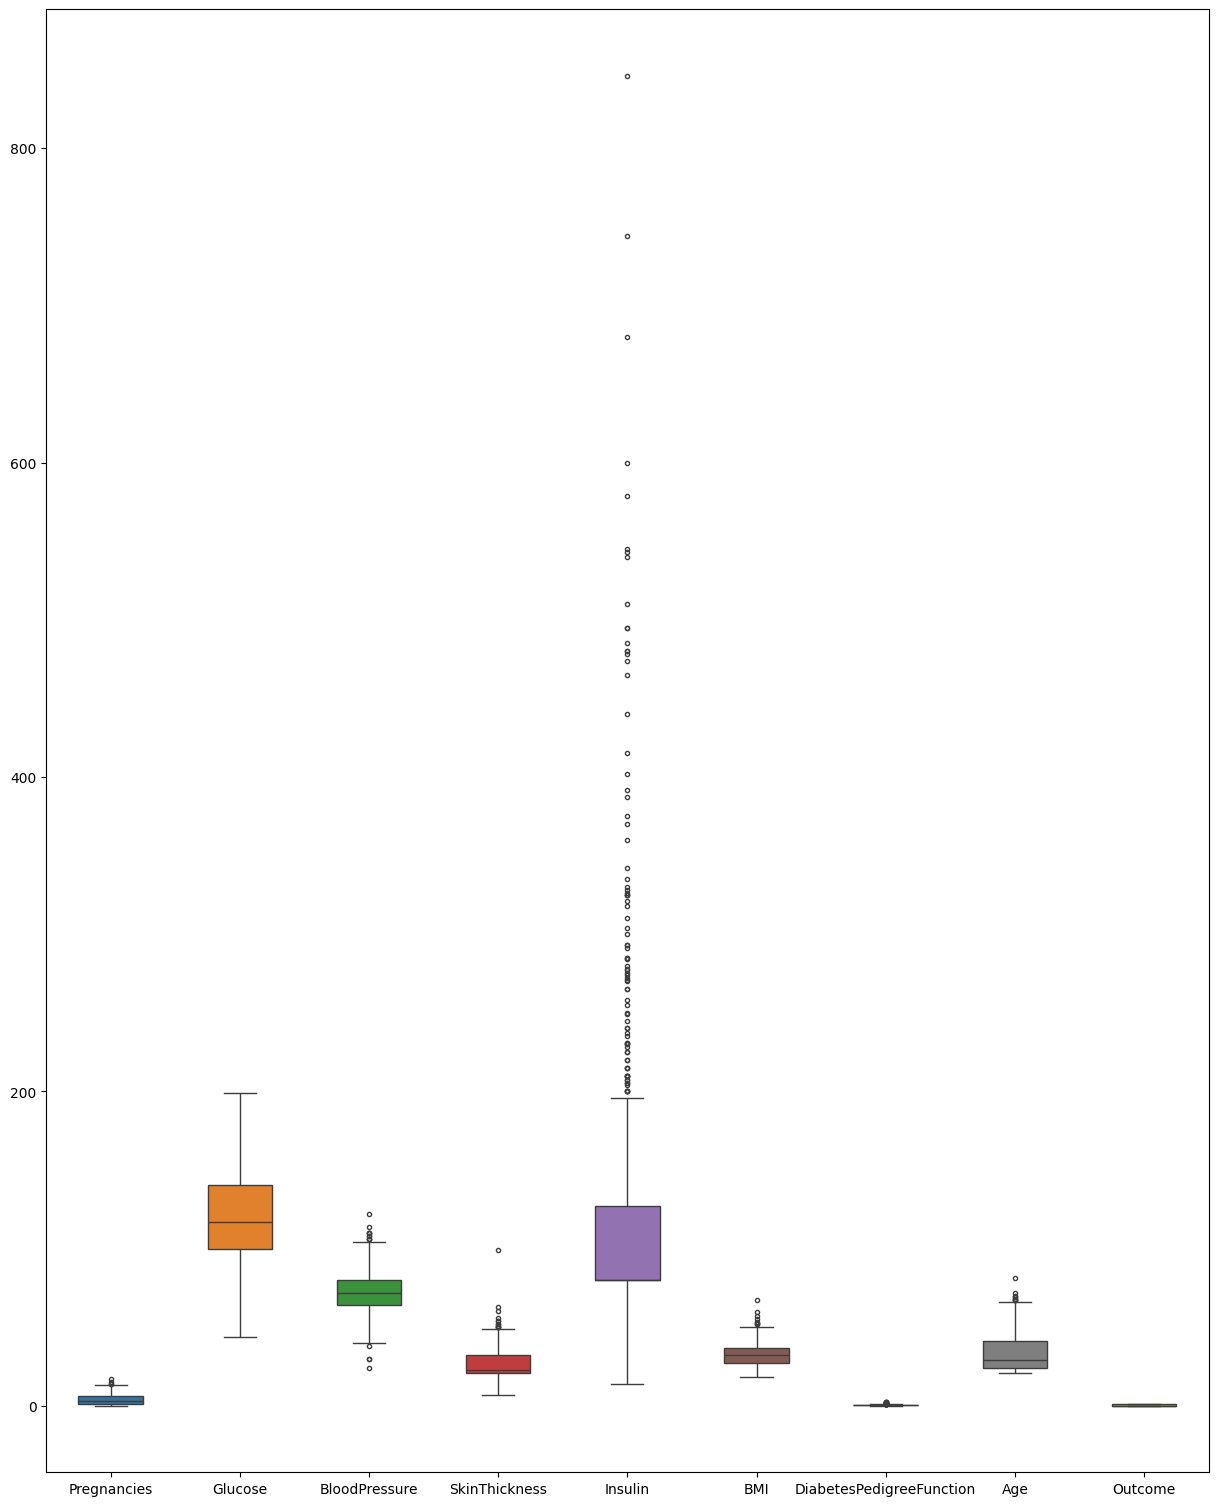

In [10]:
fig,ax = plt.subplots(figsize=(15,19))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [11]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_test.shape,x_train.shape

((192, 8), (576, 8))

In [13]:
import pickle

def scaler_standard(x_train,x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    file = open('../model/StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaled,x_test_scaled

In [14]:
x_train_scaled,x_test_scaled = scaler_standard(x_train,x_test)

In [15]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [18]:
## Hyper tuning....

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [19]:
parameter = {
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
    
}

In [20]:
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg,param_grid=parameter,cv=10,scoring='accuracy')

In [21]:
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [22]:
y_pred=clf.predict(x_test_scaled)

In [24]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


0.796875
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       143
           1       0.58      0.73      0.65        49

    accuracy                           0.80       192
   macro avg       0.74      0.78      0.75       192
weighted avg       0.82      0.80      0.80       192



In [26]:
from sklearn.metrics import confusion_matrix


In [29]:
print(confusion_matrix(y_pred,y_test))
conf = confusion_matrix(y_pred,y_test)

[[117  26]
 [ 13  36]]


In [30]:
true_positive = conf[0][0]
false_positive = conf[0][1]
false_negative = conf[1][0]
true_negative = conf[1][1]

In [31]:
accuracy = (true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive)

In [32]:
accuracy

0.796875

In [33]:
file = open('../model/Prediction.pkl','wb')
pickle.dump(clf,file)
file.close()